# Feature Selection
- Used for feature selection/dimensionality reduction on sample sets
- To improve estimators' accuracy scores or to boost their performance on very high - dimensional datasets.

## Removing features with low variance

VarianceThreshold removes all features whose variance doesn't meet some threshold. 

threshold = .8 * (1 - .8) => we remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variable, and the variance of such variables is given by
$$ Var[X] = p(1-p)$$

Example 
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

- column 1: p1 = 5/6 > .8 of containing a zero
- column 2: p2 = 2/6 < .8
- column 3: p3 = 3/6 < .0

=> remove column 1

## Univariate feature selection 
Selectting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

- **SelectKBest** removes all but the k highest scoring features
- **SelectPercentile** removes all but a use-specified highest scoring percentage of features 
- using common univariate statical tests for each feature:
    + false positive rate **SelectFpr**
    + false discovery rate **SelectFdr**
    + family wise error **SelectFwe**
- **GenericUnivariateSelect** allows to perform univariate feature selection with a configurable strategy. This allows select the best univariate selection strategy with hyper-paramenter search estimator

## Recursive feature elimination 

Given an external estimator that assigns weights to feature, the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets features. First, the estimator is trained on the initial set of features and the importance of each feature is obtanined either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.


## Feature selection as a part of the pipeline 
Pipelines are used to sequentially apply a series of statements in Machine Learning of Deep Learning, Sometimes removeing some less important features in the training set, that is, selecting the top n best features will improve the accuracy of the model, this is called feature selection. Pipelines can be used for feature selection and thus help in improving the accuracies by eliminating the unnecessary or least important features.

## test with wine dataset

In [2]:
from sklearn.datasets import load_wine
import  matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
data = load_wine()

In [4]:
dataset = pd.DataFrame(data=data.data,columns=data.feature_names)
dataset['target'] = data.target

In [5]:
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

1    71
0    59
2    48
Name: target, dtype: int64


<AxesSubplot:>

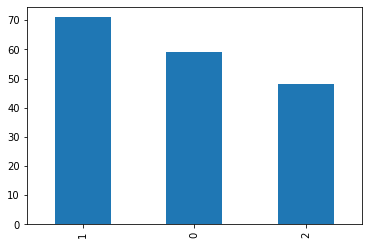

In [7]:
freq = dataset['target'].value_counts()
print(freq)
freq.plot(kind = 'bar')

In [8]:
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


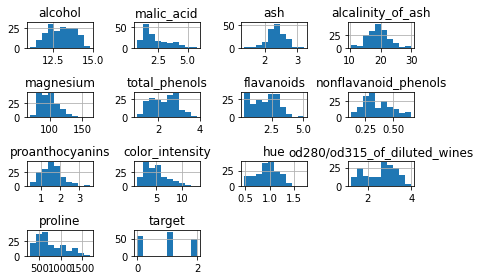

In [9]:
dataset.hist()
plt.tight_layout()
plt.show()

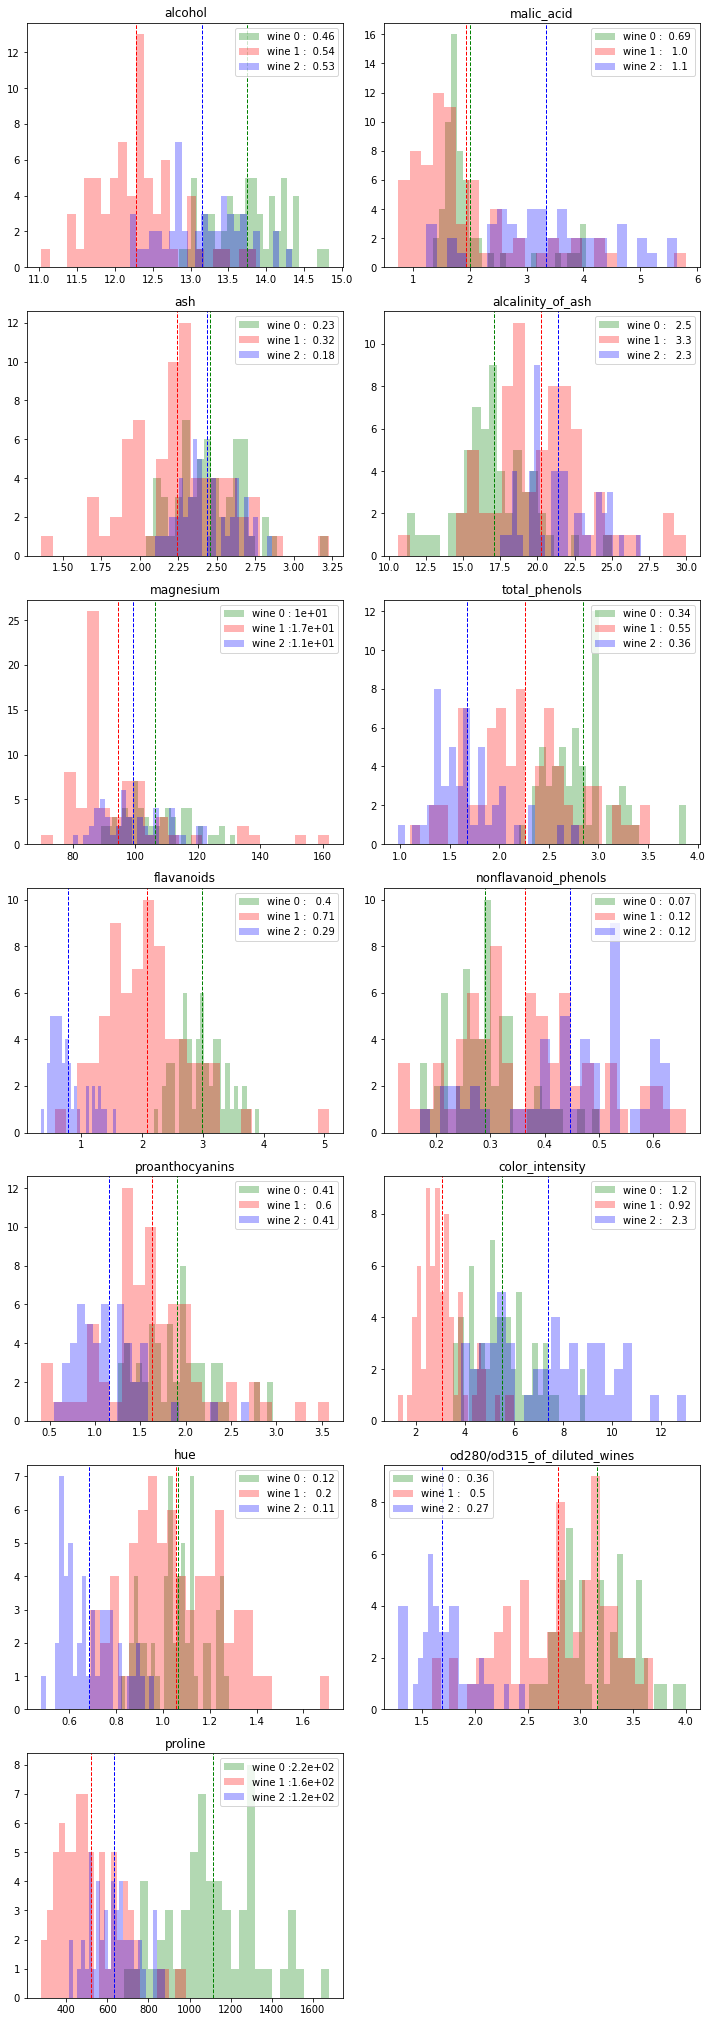

In [10]:
num_list = list(dataset.columns)[:-1]
fig = plt.figure(figsize=(10,60))

for i in range(len(num_list)):
    plt.subplot(15,2, i+1)
    plt.title(num_list[i])
    
    x1 = dataset.loc[dataset.target == 0, num_list[i]]
    x2 = dataset.loc[dataset.target == 1, num_list[i]]
    x3 = dataset.loc[dataset.target == 2, num_list[i]]
    
    kwargs = dict(alpha=0.3,bins=25)
    
    plt.hist(x1, **kwargs, color='g', label='wine 0 :' + str("{:6.2}".format(x1.std())))
    plt.hist(x2, **kwargs, color='r', label='wine 1 :' + str("{:6.2}".format(x2.std())))
    plt.hist(x3, **kwargs, color='b', label='wine 2 :' + str("{:6.2}".format(x3.std())))
    
    plt.axvline(x1.mean(), color = 'g', linestyle='dashed', linewidth=1)
    plt.axvline(x2.mean(), color = 'r', linestyle='dashed', linewidth=1)
    plt.axvline(x3.mean(), color = 'b', linestyle='dashed', linewidth=1)
    
    plt.legend()
    plt.tight_layout()

note: 
- We see all the variables in the dataset, except the target, are continuous numerical.
- No missing values in any of columns

In [11]:
dataset.iloc[:,:-1]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


<AxesSubplot:>

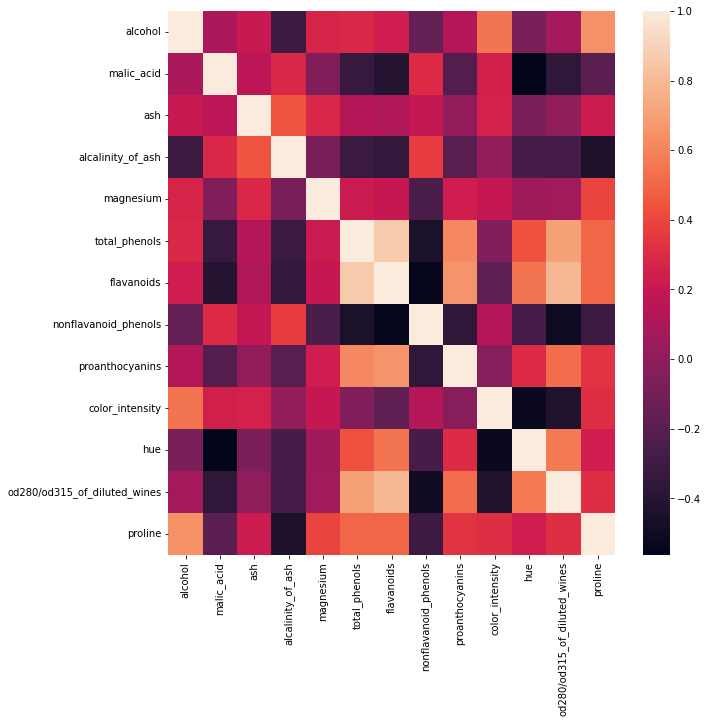

In [12]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,:-1].corr())

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
#Scaler data
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [15]:
SS = StandardScaler()
X = SS.fit_transform(X)

In [16]:
# MM = MinMaxScaler()
# X = MM.fit_transform(X)

# test with feature selection

In [70]:
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


In [18]:
def Test_model(X_train, X_test, y_train, y_test, feature_selection) :
    classifications = [['DecisionTreeClassifier',DecisionTreeClassifier()],
                        ['KNeighborsClassifier',KNeighborsClassifier()],
                        ['MLPClassifier',MLPClassifier(max_iter=500)],
                        ['Support vector classifier',SVC()]]
    res =  pd.DataFrame(index = None, columns = ['Model','Accuracy','Feature selection'])
    for mod  in classifications:
        name = mod[0]
        model = mod[1]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        res = res.append(pd.Series({'Model':name,
                                   'Accuracy':accuracy_score(y_test,y_pred),
                                   'Feature selection': feature_selection}),ignore_index=True)
    return res
        

## Do nothing

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [38]:
df1 = Test_model(X_train, X_test, y_train, y_test, 'do nothing')
df1

,Model,Accuracy,Feature selection
0,DecisionTreeClassifier,0.916667,do nothing
1,KNeighborsClassifier,0.944444,do nothing
2,MLPClassifier,0.972222,do nothing
3,Support vector classifier,0.972222,do nothing


## Removing features with low variance

In [21]:
selector = VarianceThreshold(threshold=1)
X_VT = selector.fit_transform(X)
print('X_old: ', len(X[1]), ';X_new: ', len(X_VT[1]))

X_old:  13 ;X_new:  8


In [22]:
X_VT_train, X_VT_test, y_VT_train, y_VT_test = train_test_split(X_VT,y, random_state=12)

In [23]:
df2 = Test_model(X_VT_train, X_VT_test, y_VT_train, y_VT_test, 'Variance threshold')
df2

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Model,Accuracy,Feature selection
0,DecisionTreeClassifier,0.888889,Variance threshold
1,KNeighborsClassifier,0.888889,Variance threshold
2,MLPClassifier,0.933333,Variance threshold
3,Support vector classifier,0.955556,Variance threshold


In [24]:
df_ac = pd.concat([df1,df2])

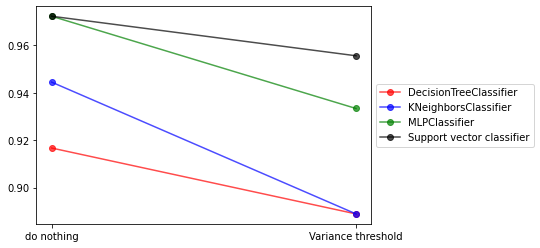

In [25]:

cdict = {'DecisionTreeClassifier':'red',
         'KNeighborsClassifier':'blue',
         'MLPClassifier': 'green',
         'Support vector classifier':'black'}
fig, ax =  plt.subplots()


for model in cdict.keys():
    df=df_ac[df_ac['Model']==model]
    plt.plot(df['Feature selection'],df['Accuracy'],c=cdict[model],label=model, marker='o', alpha = 0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Recursive feature elimination

In [64]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

SS = StandardScaler()
X = SS.fit_transform(X)

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


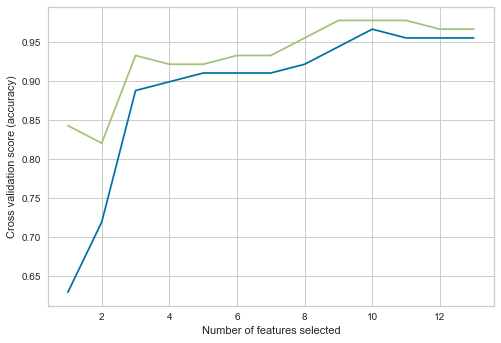

In [65]:
svc = SVC(kernel="linear")
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [60]:
! pip install yellowbrick

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


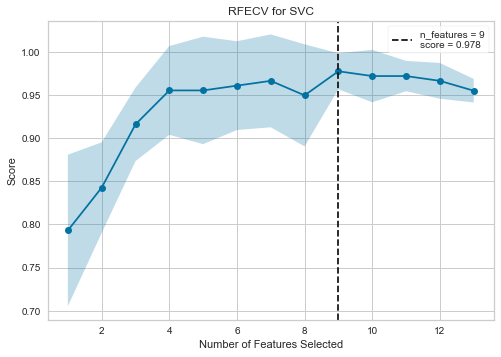

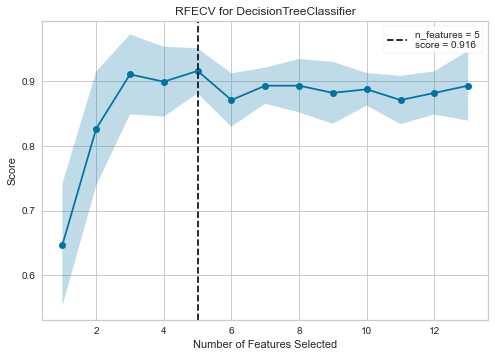

In [66]:
from yellowbrick.model_selection import RFECV as RFECV_2

classification = [SVC(kernel='linear', C=1),
                 DecisionTreeClassifier()]

for model in classification:
    visualizer = RFECV_2(model)
    visualizer.fit(X, y) 
    visualizer.show()

In [74]:

## tst Rfe  with n = 5
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model

n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.916 (0.046)


In [77]:
## tst Rfe   with n = 4

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.877 (0.041)


## Univariate feature selection 

In [39]:
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [29]:
X_new = dataset.iloc[:,:-1].values
y_new = dataset.iloc[:,-1].values

MM = MinMaxScaler()
X_new = MM.fit_transform(X_new)

X_SKB = SelectKBest(chi2, k=9).fit_transform(X_new,y_new)
print('X_new :', len(X_new[1]),'; X_SKB:', len(X_SKB[1]))

X_new : 13 ; X_SKB: 9


In [30]:
X_SKB_train, X_SKB_test, y_SKB_train, y_SKB_test = train_test_split(X_SKB, y_new)

In [31]:
df3 = Test_model(X_SKB_train, X_SKB_test, y_SKB_train, y_SKB_test, 'Select K Best')
df3

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,Model,Accuracy,Feature selection
0,DecisionTreeClassifier,0.955556,Select K Best
1,KNeighborsClassifier,1.000000,Select K Best
2,MLPClassifier,0.977778,Select K Best
3,Support vector classifier,1.000000,Select K Best


## Feature selection as part of a pipeline 

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),('svc',SVC())])

In [33]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9722222222222222

In [45]:
dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [51]:
################
# training với nhiều model
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [52]:
print(X[:3])
print(y[:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]
[0 0 0]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [54]:

Scaler = [ ['MinMaxScaler ',MinMaxScaler()], ['StandarScaler ',StandardScaler()]]

classifications = [['DecisionTreeClassifier',DecisionTreeClassifier()],
                        ['KNeighborsClassifier',KNeighborsClassifier()],
                        ['MLPClassifier',MLPClassifier(max_iter=500)],
                        ['Support vector classifier',SVC()]]

data_res = pd.DataFrame(index = None, columns=['Scaler','Model','Accuracy'])

for scaler in Scaler:
    for mod in classifications:
        pipe = Pipeline([('Scaler',scaler[1]),(mod[0],mod[1])])
        pipe.fit(X_train,y_train)
        data_res = data_res.append(pd.Series({'Scaler':scaler[0],
                                             'Model':mod[0],
                                             'Accuracy':pipe.score(X_test,y_test)}),ignore_index=True)
        
        #print(scaler[0]+' + '+mod[0]+' :=> ac:',pipe.score(X_SKB_test,y_SKB_test))

c:\users\boot.ai\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [55]:
data_res

,Scaler,Model,Accuracy
0,MinMaxScaler,DecisionTreeClassifier,0.888889
1,MinMaxScaler,KNeighborsClassifier,1.000000
2,MinMaxScaler,MLPClassifier,0.972222
3,MinMaxScaler,Support vector classifier,1.000000
4,StandarScaler,DecisionTreeClassifier,0.916667
5,StandarScaler,KNeighborsClassifier,1.000000
6,StandarScaler,MLPClassifier,0.972222
7,StandarScaler,Support vector classifier,1.000000


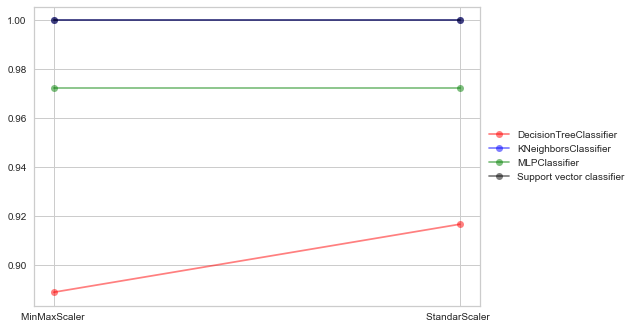

In [57]:
cdict = {'DecisionTreeClassifier':'red',
         'KNeighborsClassifier':'blue',
         'MLPClassifier': 'green',
         'Support vector classifier':'black'}

fig, ax =  plt.subplots()

for model in cdict.keys():
    df=data_res[data_res['Model']==model]
    plt.plot(df['Scaler'],df['Accuracy'],c=cdict[model],label=model, marker='o', alpha = 0.5)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()